In [2]:
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt
import numpy as np



In [3]:
w = [[1,1,1],[1.5,1.5,1.5],[2,2,2]
     ]
x = [[6],[7],8]

b = [[1],[1],[1]]

y = [[0],[1],[2]]

In [9]:
torch.manual_seed(42)
x1 = torch.rand(2,3,3,5)
x1


tensor([[[[0.8823, 0.9150, 0.3829, 0.9593, 0.3904],
          [0.6009, 0.2566, 0.7936, 0.9408, 0.1332],
          [0.9346, 0.5936, 0.8694, 0.5677, 0.7411]],

         [[0.4294, 0.8854, 0.5739, 0.2666, 0.6274],
          [0.2696, 0.4414, 0.2969, 0.8317, 0.1053],
          [0.2695, 0.3588, 0.1994, 0.5472, 0.0062]],

         [[0.9516, 0.0753, 0.8860, 0.5832, 0.3376],
          [0.8090, 0.5779, 0.9040, 0.5547, 0.3423],
          [0.6343, 0.3644, 0.7104, 0.9464, 0.7890]]],


        [[[0.2814, 0.7886, 0.5895, 0.7539, 0.1952],
          [0.0050, 0.3068, 0.1165, 0.9103, 0.6440],
          [0.7071, 0.6581, 0.4913, 0.8913, 0.1447]],

         [[0.5315, 0.1587, 0.6542, 0.3278, 0.6532],
          [0.3958, 0.9147, 0.2036, 0.2018, 0.2018],
          [0.9497, 0.6666, 0.9811, 0.0874, 0.0041]],

         [[0.1088, 0.1637, 0.7025, 0.6790, 0.9155],
          [0.2418, 0.1591, 0.7653, 0.2979, 0.8035],
          [0.3813, 0.7860, 0.1115, 0.2477, 0.6524]]]])

In [10]:
torch.manual_seed(42)
x2 = torch.rand(2,3,1,4)
x2

tensor([[[[0.8823, 0.9150, 0.3829, 0.9593]],

         [[0.3904, 0.6009, 0.2566, 0.7936]],

         [[0.9408, 0.1332, 0.9346, 0.5936]]],


        [[[0.8694, 0.5677, 0.7411, 0.4294]],

         [[0.8854, 0.5739, 0.2666, 0.6274]],

         [[0.2696, 0.4414, 0.2969, 0.8317]]]])

In [12]:
x2d = x2.view(2, -1) 
print(x2d.shape) 
x2d

torch.Size([2, 12])


tensor([[0.8823, 0.9150, 0.3829, 0.9593, 0.3904, 0.6009, 0.2566, 0.7936, 0.9408,
         0.1332, 0.9346, 0.5936],
        [0.8694, 0.5677, 0.7411, 0.4294, 0.8854, 0.5739, 0.2666, 0.6274, 0.2696,
         0.4414, 0.2969, 0.8317]])

In [13]:
x_hw = x2.view(2, 3, 4)  # remove the '1' row dimension
x_hw.shape
x_hw

tensor([[[0.8823, 0.9150, 0.3829, 0.9593],
         [0.3904, 0.6009, 0.2566, 0.7936],
         [0.9408, 0.1332, 0.9346, 0.5936]],

        [[0.8694, 0.5677, 0.7411, 0.4294],
         [0.8854, 0.5739, 0.2666, 0.6274],
         [0.2696, 0.4414, 0.2969, 0.8317]]])

In [17]:
x_matrix = x2.squeeze(3)   # removes the dimension of size 1 → (2,3,4)
print(x_matrix.shape)
x_matrix

torch.Size([2, 3, 1, 4])


tensor([[[[0.8823, 0.9150, 0.3829, 0.9593]],

         [[0.3904, 0.6009, 0.2566, 0.7936]],

         [[0.9408, 0.1332, 0.9346, 0.5936]]],


        [[[0.8694, 0.5677, 0.7411, 0.4294]],

         [[0.8854, 0.5739, 0.2666, 0.6274]],

         [[0.2696, 0.4414, 0.2969, 0.8317]]]])

In [21]:
print(x2[:, :, 0, -1]) 
x2

tensor([[0.9593, 0.7936, 0.5936],
        [0.4294, 0.6274, 0.8317]])


tensor([[[[0.8823, 0.9150, 0.3829, 0.9593]],

         [[0.3904, 0.6009, 0.2566, 0.7936]],

         [[0.9408, 0.1332, 0.9346, 0.5936]]],


        [[[0.8694, 0.5677, 0.7411, 0.4294]],

         [[0.8854, 0.5739, 0.2666, 0.6274]],

         [[0.2696, 0.4414, 0.2969, 0.8317]]]])

In [23]:
a = torch.rand(3,1)
print(a)
b = torch.rand(1,4)
print(b)
c = a + b   # → shape (3,4)
c

tensor([[0.0753],
        [0.8860],
        [0.5832]])
tensor([[0.3376, 0.8090, 0.5779, 0.9040]])


tensor([[0.4129, 0.8842, 0.6532, 0.9792],
        [1.2237, 1.6950, 1.4639, 1.7900],
        [0.9209, 1.3922, 1.1611, 1.4872]])

In [25]:
# Lets create some tensors, requires_grad tells Pytorch we want to store the gradients for this tensor
# we need to do this if we are working with basic Pytorch tensors
x = torch.FloatTensor([4])
x.requires_grad = True
w = torch.FloatTensor([2])
w.requires_grad = True
b = torch.FloatTensor([3])
b.requires_grad = True

# By performing a simple computation Pytorch will build a computational graph.
y = w * x + b    # y = 2 * x + 3

# It's easy to see that
# dy/dx = w = 2
# dy/dw = x = 4
# dy/db = 1

# Compute gradients via Pytorch's Autograd
y.backward()

# Print out the calculated gradients
# These gradients are the gradients with respect to the point where we backprop'd from - y
# Create your own equation and use the auto backprop to see the partial derivatives!
print("Calculated Gradients") 
print("dy/dx : ", x.grad.item())    # x.grad = dy/dx = 2 
print("dy/dw : ", w.grad.item())    # w.grad = dy/dw = 4
print("dy/db : ", b.grad.item())   # b.grad = dy/db = 1  
# Note: .item() simply returns a 0D Tensor as a Python scalar

Calculated Gradients
dy/dx :  2.0
dy/dw :  4.0
dy/db :  1.0


In [28]:

from torchviz import make_dot

# Create tensors with gradients
x = torch.tensor([4.0], requires_grad=True)
w = torch.tensor([2.0], requires_grad=True)
b = torch.tensor([3.0], requires_grad=True)

# Build computation
y = w * x + b

# Visualize the graph
dot = make_dot(y, params={"x": x, "w": w, "b": b})
dot.format = "png"            # output format (png or svg)
dot.render("computation_graph")

'computation_graph.png'

In [29]:
from torchviz import make_dot
dot = make_dot(y, params={"x": x, "w": w, "b": b})
dot.render("graph")


'graph.pdf'

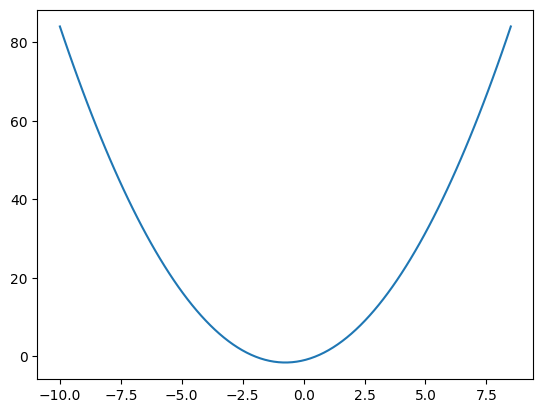

In [5]:
# Lets find the minimum of a parabola!

# Define the equation as a lambda function
fx = lambda  x: x**2 + 1.5 * x - 1

x = np.linspace(-10, 8.5, 100)

plt.plot(x, fx(x))

In [4]:
# Create a random point X
x_ = torch.randn(1)
x_.requires_grad = True

# Lets use Pytorch's Autograd to find the gradient at this point
y_ = fx(x_)
y_.backward()

# The gradient tells us the direction to travel to increase Y
dy_dx_ = x_.grad.item()
print("dy/dx is %.2f when x is %.2f" % (dy_dx_, x_))

NameError: name 'fx' is not defined

In [7]:
# Lets take some steps to decend the gradient!

# Create a random point X
x_ = torch.randn(1)
x_.requires_grad = True

# Create some loggers
x_logger = []
y_logger = []

# We'll keep track of how many steps we've done
counter = 0

# Set a scale for the step size
learning_rate = 0.01

# Initialise the gradient to a large value
dy_dx_ = 1000

# We'll limit the max number of steps so we don't create an infinite loop
max_num_steps = 1000

# Keep taking steps untill the gradient is small
while np.abs(dy_dx_) > 0.001:
    # Get the Y point at the current x value
    y_ = fx(x_)
    
    # Calculate the gradient at this point
    y_.backward()
    dy_dx_ = x_.grad.item()

    # Pytorch will not keep track of operations within a torch.no_grad() block
    # We don't want Pytorch to add our gradient decent step to the computational graph!
    with torch.no_grad():
        # Take a step down (decend) the curve
        x_ -= learning_rate * dy_dx_
        
        # Pytorch will accumulate the gradient over multiple backward passes
        # For our use case we don't want this to happen so we need to set it to zero
        # After we have used it
        x_.grad.zero_()
        
        # Log the X and Y points to plot
        x_logger.append(x_.item())
        y_logger.append(y_.item())
        
    counter += 1
    
    if counter == max_num_steps:
        break

print("Y minimum is %.2f and is when X = %.2f, found after %d steps" % (y_.item(), x_.item(), counter))

Y minimum is -1.56 and is when X = -0.75, found after 350 steps


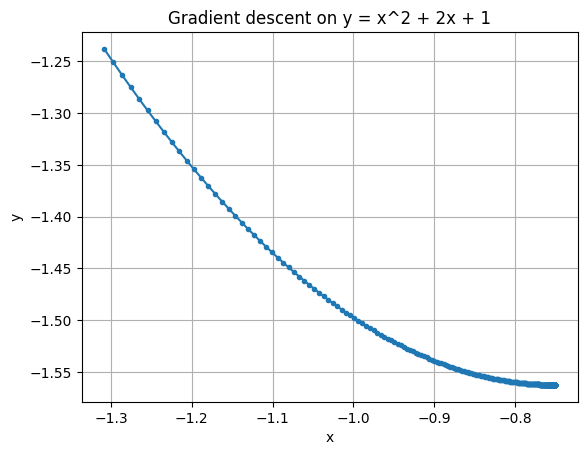

In [8]:
plt.plot(x_logger, y_logger, '-o', markersize=3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gradient descent on y = x^2 + 2x + 1')
plt.grid(True)
plt.show()